<a href="https://colab.research.google.com/github/unu-inweh/WEF-Nexus/blob/main/NEWF_Visualizer_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load Datasets & Python Libraries & Define Some Functions**

In [ ]:
# @title
from os import rename
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import clear_output

In [ ]:
# @title
!wget https://media.githubusercontent.com/media/mojtabasadegh/Food_Water_Energy/main/FoodBalance.csv
!wget https://raw.githubusercontent.com/mojtabasadegh/Food_Water_Energy/main/AQUASTAT.xlsx
!wget https://raw.githubusercontent.com/mojtabasadegh/Food_Water_Energy/main/AQUASTAT2.xlsx
!wget https://raw.githubusercontent.com/mojtabasadegh/Food_Water_Energy/main/EmissionsEnergy_Ag.csv
clear_output()

In [ ]:
# @title
def AQUASTAT(Variable, Year):
    Path='AQUASTAT.xlsx'
    df = pd.read_excel(Path)
    filtered_df = df[
        (df['Variable'] == Variable) &
        (df['Year'] == Year)
    ].copy()
    filtered_df['Area'] = filtered_df['Area'].replace({
        'Türkiye': 'Turkey', 'Iran (Islamic Republic of)': 'Iran'
    })
    if len(filtered_df) > 0 and 'Unit' in filtered_df.columns:
        unit_series = filtered_df['Unit'].dropna()
        if len(unit_series) > 0:
           unit = f'({unit_series.iloc[0]})'
        else:
           unit = ''
    else:
        unit = ''
    vmin = filtered_df['Value'].quantile(0.05)
    vmax = filtered_df['Value'].quantile(0.95)
    fig = px.choropleth(
        filtered_df,
        locations='Area',
        locationmode='country names',
        color='Value',
        hover_name='Area',
        hover_data={'Value': ':.2f', 'Area': False},
        color_continuous_scale=[
            [0.0, '#2166ac'],    # Dark blue
            [0.15, '#4393c3'],   # Medium blue
            [0.25, '#92c5de'],   # Light blue
            [0.35, '#7fbf7b'],   # Teal/green
            [0.45, '#c7e897'],   # Light green
            [0.55, '#ffffbf'],   # Yellow
            [0.65, '#fdc980'],   # Light orange
            [0.75, '#fc8d59'],   # Orange
            [0.85, '#e34a33'],   # Red-orange
            [1.0, '#b30000']     # Dark red
        ],
        labels={'Value': f'{Variable}'},
        #title=f'{Variable} - {Year}'
        range_color=[vmin, vmax]
    )

    fig.update_layout(
        geo=dict(
            showframe=True,
            showcoastlines=True,
            projection_type='natural earth',
            coastlinecolor='white',
            coastlinewidth=0.5,
            landcolor='lightgray',
            showland=True
        ),
        height=800,
        width=1200,
        font=dict(size=14, family="Arial", color="black"),  # bigger base font
        title=dict(font=dict(size=20, family="Arial", color="black", weight="bold")),
        margin=dict(l=0, r=0, t=50, b=50)  # space at bottom for colorbar
    )

    fig.update_coloraxes(
        colorbar=dict(
            title=dict(
                text=f'{Variable} {unit}',
                side="top",
                font=dict(size=16, family="Arial", color="black", weight="bold")
            ),
            orientation="h",   # horizontal
            y=-0.15,           # move below plot
            x=0.5,             # center
            xanchor="center",
            yanchor="top",
            thickness=15,
            len=0.7,
            tickfont=dict(size=14, family="Arial", color="black", weight="bold")  # bold ticks
        )
    )

    fig.write_html(f'{Variable} for {Year}.html')
    fig.show()


In [ ]:
# @title
def AQUASTAT2(Variable, Year):
    Path='AQUASTAT2.xlsx'
    df = pd.read_excel(Path)
    filtered_df = df[
        (df['Variable'] == Variable) &
        (df['Year'] == Year)
    ].copy()
    filtered_df['Area'] = filtered_df['Area'].replace({
        'Türkiye': 'Turkey', 'Iran (Islamic Republic of)': 'Iran'
    })
    if len(filtered_df) > 0 and 'Unit' in filtered_df.columns:
        unit_series = filtered_df['Unit'].dropna()
        if len(unit_series) > 0:
           unit = f'({unit_series.iloc[0]})'
        else:
           unit = ''
    else:
        unit = ''
    vmin = filtered_df['Value'].quantile(0.05)
    vmax = filtered_df['Value'].quantile(0.95)
    fig = px.choropleth(
        filtered_df,
        locations='Area',
        locationmode='country names',
        color='Value',
        hover_name='Area',
        hover_data={'Value': ':.2f', 'Area': False},
        color_continuous_scale=[
            [0.0, '#2166ac'],    # Dark blue
            [0.15, '#4393c3'],   # Medium blue
            [0.25, '#92c5de'],   # Light blue
            [0.35, '#7fbf7b'],   # Teal/green
            [0.45, '#c7e897'],   # Light green
            [0.55, '#ffffbf'],   # Yellow
            [0.65, '#fdc980'],   # Light orange
            [0.75, '#fc8d59'],   # Orange
            [0.85, '#e34a33'],   # Red-orange
            [1.0, '#b30000']     # Dark red
        ],
        labels={'Value': f'{Variable}'},
        #title=f'{Variable} - {Year}'
        range_color=[vmin, vmax]
    )

    fig.update_layout(
        geo=dict(
            showframe=True,
            showcoastlines=True,
            projection_type='natural earth',
            coastlinecolor='white',
            coastlinewidth=0.5,
            landcolor='lightgray',
            showland=True
        ),
        height=800,
        width=1200,
        font=dict(size=14, family="Arial", color="black"),  # bigger base font
        title=dict(font=dict(size=20, family="Arial", color="black", weight="bold")),
        margin=dict(l=0, r=0, t=50, b=50)  # space at bottom for colorbar
    )

    fig.update_coloraxes(
        colorbar=dict(
            title=dict(
                text=f'{Variable} {unit}',
                side="top",
                font=dict(size=16, family="Arial", color="black", weight="bold")
            ),
            orientation="h",   # horizontal
            y=-0.15,           # move below plot
            x=0.5,             # center
            xanchor="center",
            yanchor="top",
            thickness=15,
            len=0.7,
            tickfont=dict(size=14, family="Arial", color="black", weight="bold")  # bold ticks
        )
    )

    fig.write_html(f'{Variable} for {Year}.html')
    fig.show()


In [ ]:
# @title
def EmissionsEnergy(Variable,Year):
    Path = 'EmissionsEnergy_Ag.csv'
    df = pd.read_csv(Path)
    df = df[['Item', 'Element', 'Unit', f'Y{Year}', 'Area']]

    # Convert Variable to list if it's a single string
    if isinstance(Variable, str):
        Variable = [Variable]

    # Loop through each variable and create a map
    for var in Variable:
        filtered_df = df[(df['Item'] == 'Total Energy') & (df['Element'] == var)].copy()
        filtered_df['Area'] = filtered_df['Area'].replace({
            'Türkiye': 'Turkey', 'Iran (Islamic Republic of)': 'Iran'
        })


        if len(filtered_df) > 0 and 'Unit' in filtered_df.columns:
          unit_series = filtered_df['Unit'].dropna()
          if len(unit_series) > 0:
            unit = f'({unit_series.iloc[0]})'
          else:
            unit = ''
        else:
          unit = ''

        vmin = filtered_df[f'Y{Year}'].quantile(0.05)
        vmax = filtered_df[f'Y{Year}'].quantile(0.95)

        fig = px.choropleth(
            filtered_df,
            locations='Area',
            locationmode='country names',
            color=f'Y{Year}',
            hover_name='Area',
            hover_data={f'Y{Year}': ':.2f', 'Area': False},
            color_continuous_scale=[
                [0.0, '#2166ac'],    # Dark blue
                [0.15, '#4393c3'],   # Medium blue
                [0.25, '#92c5de'],   # Light blue
                [0.35, '#7fbf7b'],   # Teal/green
                [0.45, '#c7e897'],   # Light green
                [0.55, '#ffffbf'],   # Yellow
                [0.65, '#fdc980'],   # Light orange
                [0.75, '#fc8d59'],   # Orange
                [0.85, '#e34a33'],   # Red-orange
                [1.0, '#b30000']     # Dark red
            ],
            labels={'Value': f'{var}'},
            range_color=[vmin, vmax]
        )

        fig.update_layout(
            geo=dict(
                showframe=True,
                showcoastlines=True,
                projection_type='natural earth',
                coastlinecolor='white',
                coastlinewidth=0.5,
                landcolor='lightgray',
                showland=True
            ),
            height=800,
            width=1200,
            font=dict(size=14, family="Arial", color="black"),
            title=dict(font=dict(size=20, family="Arial", color="black", weight="bold")),
            margin=dict(l=0, r=0, t=50, b=50)
        )

        fig.update_coloraxes(
            colorbar=dict(
                title=dict(
                    text=f'{var} {unit}',
                    side="top",
                    font=dict(size=16, family="Arial", color="black", weight="bold")
                ),
                orientation="h",
                y=-0.15,
                x=0.5,
                xanchor="center",
                yanchor="top",
                thickness=15,
                len=0.7,
                tickfont=dict(size=14, family="Arial", color="black", weight="bold")
            )
        )

        fig.write_html(f'{var} for {Year}.html')
        fig.show()

# **Modeling the Nexus of Food, Energy, and Water**



*   Energy, water, and food resources are  **vitally interdependent**.
*   Agricultural irrigation accounts for 84% of global consumptive freshwater use, the food supply chain demands up to 30% of global primary energy use, and a large portion of global electricity generation depends on water for cooling (an average of nearly 100 liters of water withdrawn per kWh).
*   Improving understanding of the complex interactions of this resource nexus is, therefore, a top priority for human well-being, sustainable development, and policymaking.
*   Here, we present an interactive analysis toolbox, Nexus of Energy, Water, and Food (NEWF), that synthesizes available global data to enable modeling and analysis of these resources and their interdependencies at the country-level and for user-specified categories and quantities.












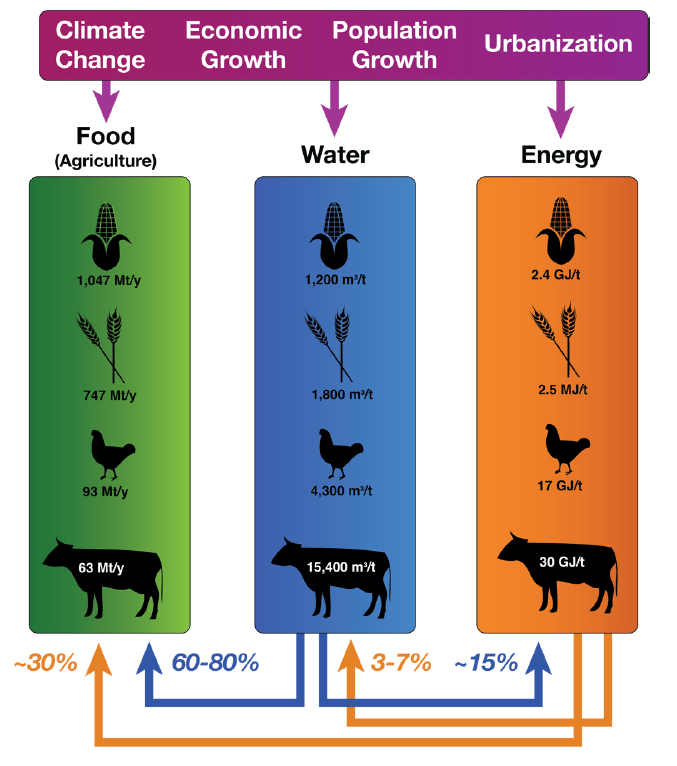



*   Energy, water, and food resources are planned for and **managed by different institutions** based on different priorities and perspectives.
*   When policymakers are concerned about food, both water and energy are considered as **inputs/constraints** to food/agricultural production.
*   One illustrative example of policymaking based on the food perspective is that of the East and Southeast Asian countries, which substantially reduced the number of hungry individuals from 134 million in 1990-92 to 65 million in 2010-12.
*   These countries achieved this goal through "rapid agricultural intensification, diversification of agriculture and international trade in food and agriculture, while increasing water use efficiency and water productivity".

*   A "system-thinking" approach should be adopted at the nexus of energy, water, and food, with the potential to be translated to pragmatic policies to warrant sustainability, resource/economic efficiency, prosperity, and public health.
*   Failure to address this issue may jeopardize resources, ecosystem services, and community security, among other concerns.
*   This nexus also faces several more challenges that require special attention of policymakers.
*   These resources are interlinked with security and functionality of societies and are traded globally in heavily regulated markets that involve politicized and inefficient pricing.
* While policymaking occurs at different levels from local and regional to international scales, policy changes in some regions may render global effects.


  

# **Country-level Water Resources and Their Interdependency with Agriculture and Energy**

In the following section, we explore 'Seasonal variability (WRI)','Interannual variability (WRI)','Total exploitable water resources' for year 2022 globally. You can change selections from the following list.

**Available years:** [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022]


**Available variables:** ['Dam capacity per capita',
       'Exploitable: irregular renewable surface water',
       'Exploitable: regular renewable groundwater',
       'Exploitable: regular renewable surface water',
       'Exploitable: total renewable surface water',
       'Interannual variability (WRI)', 'Seasonal variability (WRI)',
       'Total dam capacity', 'Total exploitable water resources',
       'Groundwater: accounted inflow',
       'Groundwater: accounted outflow to other countries',
       'Groundwater: entering the country (total)',
       'Groundwater: leaving the country to other countries (total)',
       'Surface water: accounted flow of border rivers',
       'Surface water: accounted inflow',
       'Surface water: entering the country (total)',
       'Surface water: inflow not submitted to treaties',
       'Surface water: inflow secured through treaties',
       'Surface water: inflow submitted to treaties',
       'Surface water: leaving the country to other countries (total)',
       'Surface water: outflow to other countries not submitted to treaties',
       'Surface water: outflow to other countries secured through treaties',
       'Surface water: outflow to other countries submitted to treaties',
       'Surface water: total external renewable',
       'Surface water: total flow of border rivers',
       'Water resources: total external renewable']

  Hover mouse over any country to see the values associated with the selection.

**Definition**


1.   Seasonal variability (WRI): It measures how much available freshwater supply (renewable water) varies within a year, i.e., between different months.  A higher value means there’s a large seasonal swing: for example, very wet months versus very dry months.

2.   Interannual variability (WRI): Interannual variability measures how much water availability fluctuates from year to year. Specifically, it's often defined as the standard deviation of annual total “blue water” supply divided by the mean of that supply. "Blue water" here means renewable surface + groundwater resources.

3. Total exploitable water resources: The portion of a country’s renewable water resources that can realistically be used for human purposes, considering technical, economic, environmental, and institutional constraints.


For more information, refer to https://www.fao.org/aquastat/en/

In [ ]:
variables = ['Seasonal variability (WRI)','Interannual variability (WRI)','Total exploitable water resources']
year = 2022
for var in variables:
    AQUASTAT(var, year)


In the following section, we explore agricultural, industrial and total water use for year 2022 globally. You can change selections from the following list.

**Available years:** [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

**Available Variables:** ['Total population', 'Agricultural water withdrawal',
       'Agricultural water withdrawal as % of total water withdrawal',
       'Agricultural water withdrawal per capita',
       'Environmental Flow Requirements', 'Industrial water withdrawal',
       'Industrial water withdrawal as % of total water withdrawal',
       'Industrial water withdrawal per capita',
       'Irrigation water requirement', 'Irrigation water withdrawal',
       'Municipal water withdrawal',
       'Municipal water withdrawal as % of total withdrawal',
       'Municipal water withdrawal per capita (total population)',
       'Total water withdrawal', 'Total water withdrawal per capita',
       'Water withdrawal for aquaculture',
       'Water withdrawal for cooling of thermoelectric plants',
       'Water withdrawal for livestock (watering and cleaning)']

  Hover mouse over any country to see the values associated with the selection.

**Definition:**

1.   Water Withdrawal: It is the annual volume of water taken from surface water (rivers, lakes) or groundwater (aquifers) for human use. main types of water withdrawals include:

Agricultural — for irrigation, livestock, aquaculture

Industrial — self-supplied water used in factories, power plants, etc.


Municipal (domestic) — water used by households and public services.

2. Water Consumption: Portion of the withdrawn water that is not returned to the source, because it’s “lost” (for example, via evaporation, transpiration by plants, or incorporated into products).

3. Per Capita: It is used to express a quantity divided by the number of people in a population.



In [ ]:
variables = [
    'Agricultural water withdrawal as % of total water withdrawal',
    'Agricultural water withdrawal per capita',
    'Industrial water withdrawal as % of total water withdrawal',
    'Industrial water withdrawal per capita',
    'Total water withdrawal',
    'Total water withdrawal per capita'
]

year = 2022
for var in variables:
    AQUASTAT2(var, year)

In the following section, total energy use (including natural gas, petrolum and electricity) and associated emissions in the agricultural sector in year 2022 globally. You can change selections from the following list.

**Available years:** 1992-2022 annually

Hover mouse over any country to see the values associated with the selection.

In [ ]:
Year = 1992
Variable = ['Energy use in agriculture','Emissions (CO2)','Emissions (CH4)','Emissions (N2O)']
EmissionsEnergy(Variable,Year)


# **Food Production**
In this section, we explore total food production in a user-specific category in each country globally in any year between 2010-2022. Users can select their food name/category from a dropdown list.

Hover mouse over any country to see the values associated with the selection.

In [ ]:
# @title
import pandas as pd
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display
import plotly.io as pio
pio.renderers.default = 'notebook'
from google.colab import output
output.enable_custom_widget_manager()
import plotly.express as px

YEAR = 2022

def FoodBalancec(Item, Year):
    PATH_ = 'FoodBalance.csv'
    df = pd.read_csv(PATH_)
    YEAR_COL = f'Y{Year}'

    filtered_df = df[(df['Item'] == Item)][['Area', YEAR_COL, 'Unit']].copy()

    filtered_df = filtered_df.rename(columns={'Area': 'Country', YEAR_COL: 'Value'})

    filtered_df['Country'] = filtered_df['Country'].replace({
        'Türkiye': 'Turkey', 'Iran (Islamic Republic of)': 'Iran'
    })

    filtered_df['Value'] = pd.to_numeric(filtered_df['Value'], errors='coerce')
    filtered_df = filtered_df.dropna(subset=['Value'])

    if len(filtered_df) > 0 and 'Unit' in filtered_df.columns:
        unit_series = filtered_df['Unit'].dropna()
        if len(unit_series) > 0:
            unit = f'({unit_series.iloc[0]})'
        else:
            unit = ''
    else:
        unit = ''

    vmin = filtered_df['Value'].quantile(0.05)
    vmax = filtered_df['Value'].quantile(0.95)

    fig = px.choropleth(
        filtered_df,
        locations='Country',
        locationmode='country names',
        color='Value',
        hover_name='Country',
        hover_data={'Value': ':.2f', 'Country': False},
        color_continuous_scale=[
            [0.0, '#2166ac'],
            [0.15, '#4393c3'],
            [0.25, '#92c5de'],
            [0.35, '#7fbf7b'],
            [0.45, '#c7e897'],
            [0.55, '#ffffbf'],
            [0.65, '#fdc980'],
            [0.75, '#fc8d59'],
            [0.85, '#e34a33'],
            [1.0, '#b30000']
        ],
        labels={'Value': f'{Item}'},
        range_color=[vmin, vmax]
    )

    fig.update_layout(
        geo=dict(
            showframe=True,
            showcoastlines=True,
            projection_type='natural earth',
            coastlinecolor='white',
            coastlinewidth=0.5,
            landcolor='lightgray',
            showland=True
        ),
        height=800,
        width=1200,
        font=dict(size=14, family="Arial", color="black"),
        title=dict(font=dict(size=20, family="Arial", color="black", weight="bold")),
        margin=dict(l=0, r=0, t=50, b=50)
    )

    fig.update_coloraxes(
        colorbar=dict(
            title=dict(
                text=f'{Item} {unit}',
                side="top",
                font=dict(size=16, family="Arial", color="black", weight="bold")
            ),
            orientation="h",
            y=-0.15,
            x=0.5,
            xanchor="center",
            yanchor="top",
            thickness=15,
            len=0.7,
            tickfont=dict(size=14, family="Arial", color="black", weight="bold")
        )
    )

    fig.write_html(f'{Item} for {Year}.html')
    display(go.FigureWidget(fig))


df_energy_full = pd.read_csv('FoodBalance.csv')
item_options = sorted(df_energy_full['Item'].unique())

item_selector = widgets.Dropdown(
    options=item_options,
    value=item_options[0],
    description='Select Item:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='400px'),
    disabled=False
)

map_output = widgets.Output()

def Flood_Balace_Map(item):
    with map_output:
        map_output.clear_output(wait=True)
        FoodBalancec(item, YEAR)

def on_item_change(change):
    Flood_Balace_Map(item_selector.value)

item_selector.observe(on_item_change, names='value')

display(widgets.HTML("<h3 style='font-weight:bold'>Select Item to Display on Map</h3>"))
display(widgets.VBox([item_selector, map_output]))

Flood_Balace_Map(item_selector.value)

In this section, we explore trends in per capita Food Supply and Proetin Supply in each food category. User can select the country and food of interest from a drop down menu.

In [ ]:
# @title
%reset -f

In [ ]:
# @title
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
# @title
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import display
import plotly.io as pio
pio.renderers.default = 'notebook'



# File paths
PATH_ = 'FoodBalance.csv'
df = pd.read_csv(PATH_)
areas = sorted(df['Area'].unique())
items = sorted(df['Item'].unique())

# Create dropdowns
area_dropdown = widgets.Dropdown(
    options=areas,
    value=areas[0],
    description='Country:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='400px')
)

item_dropdown = widgets.Dropdown(
    options=items,
    value=items[0],
    description='Item:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='400px')
)

# Output widget for the plot
output = widgets.Output()

def plot_time_series(area, item):
    """Plot time series with dual y-axes for selected area and item"""

    with output:
        output.clear_output(wait=True)

        # Filter data
        df_filtered = df[(df['Area'] == area) & (df['Item'] == item)].copy()

        if len(df_filtered) == 0:
            print(f"No data available for {area} - {item}")
            return

        # Get year columns
        year_columns = [col for col in df.columns if col.startswith('Y') and col[1:].isdigit()]
        years = [int(col[1:]) for col in year_columns]

        # Get the two variables
        food_supply = df_filtered[df_filtered['Element'] == 'Food supply (kcal/capita/day)']
        protein_supply = df_filtered[df_filtered['Element'] == 'Protein supply quantity (g/capita/day)']

        # Extract values for each year
        food_values = food_supply[year_columns].values[0] if len(food_supply) > 0 else []
        protein_values = protein_supply[year_columns].values[0] if len(protein_supply) > 0 else []

        # Create figure with secondary y-axis
        fig = make_subplots(specs=[[{"secondary_y": True}]])

        # Add food supply trace
        if len(food_values) > 0:
            fig.add_trace(
                go.Scatter(
                    x=years,
                    y=food_values,
                    name='Food supply (kcal/capita/day)',
                    mode='lines+markers',
                    line=dict(color='#006837', width=3),
                    marker=dict(size=7)
                ),
                secondary_y=False
            )

        # Add protein supply trace
        if len(protein_values) > 0:
            fig.add_trace(
                go.Scatter(
                    x=years,
                    y=protein_values,
                    name='Protein supply (g/capita/day)',
                    mode='lines+markers',
                    line=dict(color='#081d58', width=3),
                    marker=dict(size=7)
                ),
                secondary_y=True
            )

        # Update layout
        fig.update_layout(
            title=dict(
                text=f'{area} - {item}',
                x=0.5,
                xanchor='center',
                font=dict(size=24, family='Arial', color='black', weight='bold')
            ),
            hovermode='x unified',
            plot_bgcolor='white',
            width=1000,
            height=550,
            legend=dict(
                orientation="h",   # horizontal
                y=-0.2,            # below the plot
                x=0.5,
                xanchor='center',
                font=dict(size=16, family='Arial', color='black', weight='bold'),
                bgcolor='rgba(255, 255, 255, 0.8)',
                bordercolor='black',
                borderwidth=1
            ),
            margin=dict(l=80, r=80, t=100, b=100)
        )

        # Update x-axis
        fig.update_xaxes(
            title_text=' ',
            showgrid=True,
            gridcolor='lightgray',
            linecolor='black',
            linewidth=1,
            mirror=True,
            tickfont=dict(size=16, family='Arial', color='black', weight='bold'),
            title_font=dict(size=18, family='Arial', color='black', weight='bold')
        )

        # Update y-axes
        fig.update_yaxes(
            title_text='Food supply (kcal/capita/day)',
            secondary_y=False,
            showgrid=True,
            gridcolor='lightgray',
            linecolor='black',
            linewidth=1,
            mirror=True,
            tickfont=dict(size=16, family='Arial', color='black', weight='bold'),
            title_font=dict(size=18, family='Arial', color='black', weight='bold')
        )

        fig.update_yaxes(
            title_text='Protein supply (g/capita/day)',
            secondary_y=True,
            showgrid=False,
            linecolor='black',
            linewidth=1,
            mirror=True,
            tickfont=dict(size=16, family='Arial', color='black', weight='bold'),
            title_font=dict(size=18, family='Arial', color='black', weight='bold')
        )
        display(go.FigureWidget(fig))
def on_change(change):
    plot_time_series(area_dropdown.value, item_dropdown.value)

area_dropdown.observe(on_change, names='value')
item_dropdown.observe(on_change, names='value')
display(widgets.VBox([area_dropdown, item_dropdown, output]))
plot_time_series(area_dropdown.value, item_dropdown.value)


The following section is very similar to the one above, but is more general allowing for selection of a wider range of variables. User first selects the country of interest, then select "items" and "elements" from a dropdown menu. Options include:

Items = ['Alcohol, Non-Food', 'Alcoholic Beverages', 'Animal Products', 'Animal fats', 'Apples and products', 'Aquatic Animals, Others', 'Aquatic Plants', 'Aquatic Products, Other', 'Bananas', 'Barley and products', 'Beans', 'Beer', 'Beverages, Alcoholic', 'Beverages, Fermented', 'Bovine Meat', 'Butter, Ghee', 'Cassava and products', 'Cephalopods', 'Cereals - Excluding Beer', 'Cereals, other', 'Citrus, Other', 'Cloves', 'Cocoa Beans and products', 'Coconut Oil', 'Coconuts - Incl Copra', 'Coffee and products', 'Cottonseed', 'Cottonseed Oil', 'Cream', 'Crustaceans', 'Dates', 'Demersal Fish', 'Eggs', 'Fats, Animals, Raw', 'Fish, Body Oil', 'Fish, Liver Oil', 'Fish, Seafood', 'Freshwater Fish', 'Fruits - Excluding Wine', 'Fruits, other', 'Grand Total', 'Grapefruit and products', 'Grapes and products (excl wine)', 'Groundnut Oil', 'Groundnuts', 'Honey', 'Infant food', 'Lemons, Limes and products', 'Maize Germ Oil', 'Maize and products', 'Marine Fish, Other', 'Meat', 'Meat, Aquatic Mammals', 'Meat, Other', 'Milk - Excluding Butter', 'Millet and products', 'Miscellaneous', 'Molluscs, Other', 'Mutton & Goat Meat', 'Nuts and products', 'Oats', 'Offals', 'Offals, Edible', 'Oilcrops', 'Oilcrops Oil, Other', 'Oilcrops, Other', 'Olive Oil', 'Olives (including preserved)', 'Onions', 'Oranges, Mandarines', 'Palm Oil', 'Palm kernels', 'Palmkernel Oil', 'Peas', 'Pelagic Fish', 'Pepper', 'Pigmeat', 'Pimento', 'Pineapples and products', 'Plantains', 'Population', 'Potatoes and products', 'Poultry Meat', 'Pulses', 'Pulses, Other and products', 'Rape and Mustard Oil', 'Rape and Mustardseed', 'Rice and products', 'Ricebran Oil', 'Roots, Other', 'Rye and products', 'Sesame seed', 'Sesameseed Oil', 'Sorghum and products', 'Soyabean Oil', 'Soyabeans', 'Spices', 'Spices, Other', 'Starchy Roots', 'Stimulants', 'Sugar & Sweeteners', 'Sugar (Raw Equivalent)', 'Sugar Crops', 'Sugar beet', 'Sugar cane', 'Sugar non-centrifugal', 'Sunflower seed', 'Sunflowerseed Oil', 'Sweet potatoes', 'Sweeteners, Other', 'Tea (including mate)', 'Tomatoes and products', 'Treenuts', 'Vegetable Oils', 'Vegetables', 'Vegetables, other', 'Vegetal Products', 'Wheat and products', 'Wine', 'Yams']

Elements = ['Domestic supply quantity', 'Export quantity', 'Fat supply quantity (g/capita/day)', 'Fat supply quantity (t)', 'Feed', 'Food', 'Food supply (kcal)', 'Food supply (kcal/capita/day)', 'Food supply quantity (kg/capita/yr)', 'Import quantity', 'Losses', 'Other uses (non-food)', 'Processing', 'Production', 'Protein supply quantity (g/capita/day)', 'Protein supply quantity (t)', 'Residuals', 'Seed', 'Stock Variation', 'Total Population - Both sexes', 'Tourist consumption']



In [ ]:
# @title
%reset -f

In [ ]:
# @title
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
# @title
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import display
import plotly.io as pio
pio.renderers.default = 'notebook'



# File paths
PATH_ = 'FoodBalance.csv'
df = pd.read_csv(PATH_)
areas = sorted(df['Area'].unique())
items = sorted(df['Item'].unique())
elements = sorted(df['Element'].unique())

# Create dropdowns
area_dropdown = widgets.Dropdown(
    options=areas,
    value=areas[0],
    description='Country:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='400px')
)

item_dropdown = widgets.Dropdown(
    options=items,
    value=items[0],
    description='Item:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='400px')
)

#
element_dropdown = widgets.Dropdown(
    options=elements,
    value=elements[0],
    description='Element:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='400px')
)

# Output widget for the plot
output = widgets.Output()

def plot_time_series(area, item, element):
    """Plot time series with dual y-axes for selected area and item and element"""

    with output:
        output.clear_output(wait=True)

        # Filter data
        df_filtered = df[(df['Area'] == area) & (df['Item'] == item) & (df['Element'] == element)].copy()


        if len(df_filtered) == 0:
            print(f"No data available for {area} - {item} - {element}")
            return

        # Get year columns
        year_columns = [col for col in df.columns if col.startswith('Y') and col[1:].isdigit()]
        years = [int(col[1:]) for col in year_columns]

        # Get the two variables
        Var1 = df_filtered[df_filtered['Element'] == element]


        # Extract values for each year
        Var1_values = Var1[year_columns].values[0] if len(Var1) > 0 else []


        # Create figure with secondary y-axis
        fig = make_subplots()

        # Add Var1 trace
        if len(Var1_values) > 0:
            fig.add_trace(
                go.Scatter(
                    x=years,
                    y=Var1_values,
                    name= item + ' : ' + element,# + '\n' + str(df_filtered['Unit'].iloc[0]),
                    mode='lines+markers',
                    line=dict(color='#006837', width=3),
                    marker=dict(size=7)
                ),
                secondary_y=False
            )

        # Update layout
        fig.update_layout(
            title=dict(
                text=f'{area} - {item} - {element} {' ('}{str(df_filtered['Unit'].iloc[0])}{')'}',
                x=0.5,
                xanchor='center',
                font=dict(size=24, family='Arial', color='black', weight='bold')
            ),
            hovermode='x unified',
            plot_bgcolor='white',
            width=1000,
            height=550,
            legend=dict(
                orientation="h",   # horizontal
                y=-0.2,            # below the plot
                x=0.5,
                xanchor='center',
                font=dict(size=16, family='Arial', color='black', weight='bold'),
                bgcolor='rgba(255, 255, 255, 0.8)',
                bordercolor='black',
                borderwidth=1
            ),
            margin=dict(l=80, r=80, t=100, b=100)
        )

        # Update x-axis
        fig.update_xaxes(
            title_text=' ',
            showgrid=True,
            gridcolor='lightgray',
            linecolor='black',
            linewidth=1,
            mirror=True,
            tickfont=dict(size=16, family='Arial', color='black', weight='bold'),
            title_font=dict(size=18, family='Arial', color='black', weight='bold')
        )

        # Update y-axes
        fig.update_yaxes(
            title_text=item + ' : ' + element,# + '\n' + str(df_filtered['Unit'].iloc[0]),
            secondary_y=False,
            showgrid=True,
            gridcolor='lightgray',
            linecolor='black',
            linewidth=1,
            mirror=True,
            tickfont=dict(size=16, family='Arial', color='black', weight='bold'),
            title_font=dict(size=18, family='Arial', color='black', weight='bold')
        )


        display(go.FigureWidget(fig))
def on_change(change):
    plot_time_series(area_dropdown.value, item_dropdown.value, element_dropdown.value)

area_dropdown.observe(on_change, names='value')
item_dropdown.observe(on_change, names='value')
element_dropdown.observe(on_change, names='value')

display(widgets.VBox([area_dropdown, item_dropdown, element_dropdown, output]))
plot_time_series(area_dropdown.value, item_dropdown.value, element_dropdown.value)


# **Water, Food, Energy Together at the Country-level**
In this section, we evaluate water, energy and agricultural production together in a set of user selected countries. X-axis shows energy per unit agricultural production (lower values preferred) and Y-axis shows water withdrawal per unit energy used (lower values preferred). Each point is color-coded by per capita agricultural production (high values/ more red colors preferred).  

User can hold "ctrl" and click on any country name to be added to the list.


In [ ]:
# @title
import pandas as pd
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display
import plotly.io as pio
pio.renderers.default = 'notebook'
from google.colab import output
output.enable_custom_widget_manager()
import pandas as pd

# Configuration
YEAR = 2022
YEAR_COL = f'Y{YEAR}'



PATH_ENERGY = 'EmissionsEnergy_Ag.csv'
PATH_FOOD = 'FoodBalance.csv'
PATH_AQUASTAT = 'AQUASTAT2.xlsx'

df_energy = (pd.read_csv(PATH_ENERGY)
             [['Item', 'Element', 'Unit', YEAR_COL, 'Area']]
             .query("Item == 'Total Energy' & Element == 'Energy use in agriculture'")
             [['Area', YEAR_COL]]
             .rename(columns={'Area': 'Country', YEAR_COL: 'Total Energy use in agriculture'}))
df_production = (pd.read_csv(PATH_FOOD)
                 [['Element', 'Unit', YEAR_COL, 'Area']]
                 .query("Element == 'Production'")
                 .groupby('Area', as_index=False)[YEAR_COL]
                 .sum()
                 .rename(columns={'Area': 'Country', YEAR_COL: 'total production agriculture'}))
df_aquastat = pd.read_excel(PATH_AQUASTAT)[['Variable', 'Area', 'Year', 'Value']]
df_aquastat = df_aquastat[df_aquastat['Year'] == YEAR]
df_water = (df_aquastat[df_aquastat['Variable'] == 'Agricultural water withdrawal']
            [['Area', 'Value']]
            .rename(columns={'Area': 'Country', 'Value': 'Agricultural water withdrawal'}))

df_population = (df_aquastat[df_aquastat['Variable'] == 'Total population']
                 [['Area', 'Value']]
                 .rename(columns={'Area': 'Country', 'Value': 'Total population'}))
df_final = (df_production
            .merge(df_energy, on='Country', how='inner')
            .merge(df_water, on='Country', how='inner')
            .merge(df_population, on='Country', how='inner'))
df_final['Energy per Unit Agriculture Production (TJ/1000t)'] = (df_final['Total Energy use in agriculture'] /
                                           df_final['total production agriculture'])

df_final['Water per Unit Agriculture Production (km³/t)'] = (df_final['Agricultural water withdrawal'] /
                                          df_final['total production agriculture'])

df_final['Per Capita Agricultural Production (1000t)'] = (df_final['total production agriculture'] /
                                      df_final['Total population'])
exclude = [
    'Europe', 'World', 'Africa', 'Americas', 'Northern Africa', 'Southern Africa',
    'Northern America', 'Oceania', 'Western Asia', 'Eastern Asia', 'South-eastern Asia',
    'Central Asia', 'Land Locked Developing Countries', 'Least Developed Countries',
    'Small Island Developing States', 'Australia and New Zealand'
]
df = df_final[~df_final['Country'].isin(exclude)].copy()

import random

country_selector = widgets.SelectMultiple(
    options=sorted(df['Country'].unique()),
    value=random.sample(sorted(df['Country'].unique()), 3),  # 3 random countries selected by default
    description='Select Countries:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='400px', height='120px'),
    disabled=False
)

# Output widget for the plot
output = widgets.Output()

def plot_countries(selected_countries):
    """Plot scatter plot for selected countries"""

    with output:
        output.clear_output(wait=True)

        # Filter dataframe for selected countries
        df_filtered = df[df['Country'].isin(selected_countries)].copy()

        if len(df_filtered) == 0:
            print("Please select at least one country")
            return

        # Create scatter plot
        fig = go.Figure()

        fig.add_trace(go.Scatter(
            x=df_filtered['Energy per Unit Agriculture Production (TJ/1000t)'],
            y=df_filtered['Water per Unit Agriculture Production (km³/t)'],
            mode='markers+text',
            text=df_filtered['Country'],
            textposition='top center',
            textfont=dict(size=16, family='Arial', color='black', weight='bold'),  # **Increased & bold text**
            marker=dict(
                size=20,
                color=df_filtered['Per Capita Agricultural Production (1000t)'],
                colorscale='RdYlBu_r',
                showscale=True,
                line=dict(color='black', width=2),
                colorbar=dict(
                    title=dict(
                        text='Per Capita Agricultural Production (1000t)',
                        font=dict(size=18, family='Arial', color='black', weight='bold'),
                        side='right'  # **Vertical title on the right**
                    ),
                    thickness=30,
                    x=1.15,  # **Move colorbar further right**
                    xanchor='left',
                    tickfont=dict(size=14, family='Arial', color='black', weight='bold')
                )
            ),
            hovertemplate='<b>%{text}</b><br>' +
                          'Energy per Unit Agriculture Production: %{x:.2f} TJ/1000t<br>' +
                          'Water per Unit Agriculture Production: %{y:.2f} km³/t<br>' +
                          'Per Capita Agricultural Production: %{marker.color:.2f} 1000t<br>' +
                          '<extra></extra>'
        ))

        # Update layout with bold fonts and larger sizes
        fig.update_layout(
            title=dict(
                text='Water, Energy and Ag Production',
                x=0.5,
                xanchor='center',
                font=dict(size=28, family='Arial', color='black', weight='bold')
            ),
            xaxis=dict(
                title='Energy per Unit Agriculture Production (TJ/1000t)',
                showgrid=True,
                gridcolor='lightgray',
                linecolor='black',
                linewidth=3,
                mirror=True,
                tickfont=dict(size=18, family='Arial', color='black', weight='bold'),
                title_font=dict(size=20, family='Arial', color='black', weight='bold')
            ),
            yaxis=dict(
    title='Water per Unit Agriculture Production (km³/t)',
    showgrid=True,
    gridcolor='lightgray',
    linecolor='black',
    linewidth=3,
    mirror=True,
    tickfont=dict(size=18, family='Arial', color='black', weight='bold'),
    title_font=dict(size=20, family='Arial', color='black', weight='bold'),
    exponentformat='power',  # Add this line
    showexponent='all'       # Add this line
),
            plot_bgcolor='white',
            width=1000,
            height=700,
            margin=dict(l=120, r=200, t=120, b=100)  # **Increased right margin**
        )

        # Display the figure using FigureWidget for better Jupyter compatibility
        display(go.FigureWidget(fig))


# Connect dropdown to plotting function
def on_change(change):
    plot_countries(list(country_selector.value))

country_selector.observe(on_change, names='value')

# Display widgets
display(widgets.HTML("<h3 style='font-weight:bold'>Select Countries (Hold Ctrl/Cmd and click to select multiple)</h3>"))
display(widgets.VBox([country_selector, output]))

plot_countries(list(country_selector.value))